## Car Data Set Analysis by Jake Sonsini

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/Automobile.csv")

Data Exploration

In [4]:
# Get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# Observe rows
df.head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


Observing the data I found that there are no null values and the data is very clean.

### Exploring MPG

### What was the most effecient car and what year did it come from?

Text(0, 0.5, 'MPG')

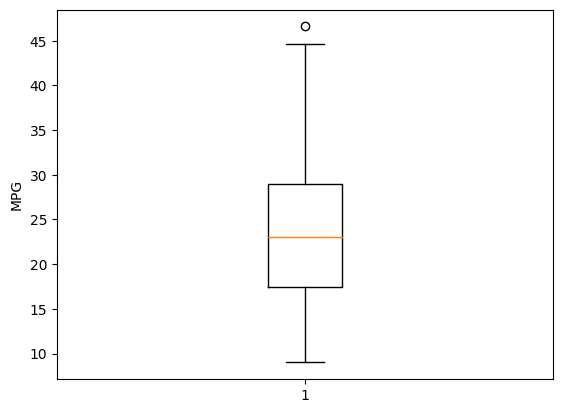

In [6]:
plt.boxplot(df["mpg"])
plt.ylabel("MPG")

At first I was confused why there was so much varience as I would expect cars from the 70s to 80s to be very ineffecient, but then after research I discovered the oil crisis in the 80s which caused gas to be extrememly expensive making sense to the varience.

In [7]:
summary_stats = df.describe()
summary_stats.loc[["min", "max"], ["mpg", "model_year"]]

,mpg,model_year
min,9.0,70.0
max,46.6,82.0


In [14]:
df.sort_values(["mpg"], ascending=False).head(1)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,power_to_weight
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan,30.805687


In [15]:
df.sort_values(["mpg"]).head(1)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,power_to_weight
28,hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,usa,40.786137


Sure enough the least effecient model is from 1970 the lowest date in the dataset and the most effecient model is from 1980, almost the highest date in the dataset.

Text(0, 0.5, 'Displacement(in^3)')

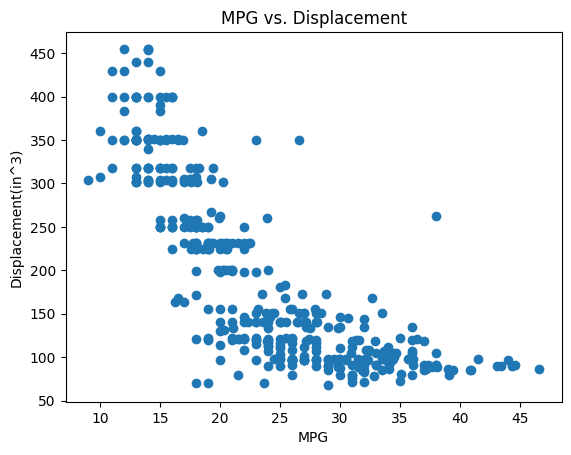

In [8]:
plt.title("MPG vs. Displacement")
plt.scatter(df["mpg"], df["displacement"])
plt.xlabel("MPG")
plt.ylabel("Displacement(in^3)")

Curious about correlation of displacement and mpg I created a scatterplot to find that they are inversely proportional.

## Exploring Horsepower

### Does higher displacement mean higher horsepower?

In [9]:
summary_stats = df.describe()
summary_stats.loc[["min", "max"], ["horsepower", "displacement"]]

,horsepower,displacement
min,46.0,68.0
max,230.0,455.0


From experience I knew that displacement was a way to get higher horsepower, which I tested by finding the max and min horsepower, so I created a scatterplot to show the relation.

Text(0, 0.5, 'Displacement(in^3)')

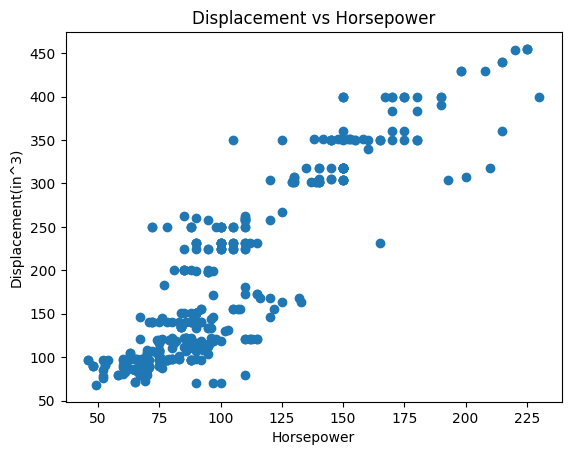

In [10]:
plt.scatter(df["horsepower"], df["displacement"])
plt.title("Displacement vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Displacement(in^3)")

This scatter plot showed how there was a definite correlation between displacement and horsepower, although at around 100 hp the displacement varied the most.

I was also curious about the power to weight ratio of cars, as that is incredibly important for acceleration, so I created that new column. To make values larger I divided by every thousand pounds.

## Exploring power to weight ratio

### Did power to weight ratio change during the oil crisis?

Text(0, 0.5, 'power to weight ratio')

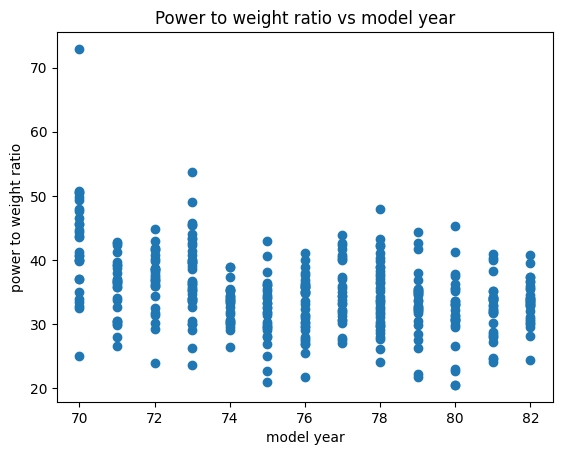

In [11]:
df["power_to_weight"] = df["horsepower"] / (df["weight"] / 1000)

plt.scatter(df["model_year"], df["power_to_weight"])
plt.title("Power to weight ratio vs model year")
plt.xlabel("model year")
plt.ylabel("power to weight ratio")


Creating this scatter plot I was hoping to see a progression in power to weight ratio but found practically no change. Even in the 80s when most cars had no power at all the ratios were very similar.